In [2]:
pip install tensorflow pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

DATA download & loading

In [34]:
df = pd.read_csv("C:/data/jena.csv", index_col=0)
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2


필요로하는 열 선택

In [36]:
temps = df['T (degC)'].values
temps = temps.astype('float32')
temps = (temps - temps.mean()) / temps.std()

In [38]:
def create_dataset(series, history_size, target_size):
    data = []
    labels = []
    for i in range(len(series) - history_size - target_size):
        data.append(series[i:i+history_size])
        labels.append(series[i+history_size+target_size-1])
    return np.array(data), np.array(labels)

history_size = 120  # 과거 120개 step
target_size = 1     # 1-step 예측
X, y = create_dataset(temps, history_size, target_size)

In [40]:
X = np.expand_dims(X, axis=-1)  
X_train, X_val = X[:200000], X[200000:250000]
y_train, y_val = y[:200000], y[200000:250000]

LSTM

In [42]:
model = tf.keras.models.Sequential([
    layers.LSTM(32, input_shape=X_train.shape[1:]),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

C:\Users\rlfrn\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 158s 98ms/step - loss: 0.0559 - val_loss: 0.0012
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 94ms/step - loss: 0.0014 - val_loss: 7.0154e-04
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 96ms/step - loss: 9.4296e-04 - val_loss: 6.0150e-04
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 97ms/step - loss: 7.3495e-04 - val_loss: 6.2526e-04
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 100ms/step - loss: 6.5696e-04 - val_loss: 4.8377e-04


시각화

In [50]:
def plot_prediction(history_data, true_future, prediction):
    plt.figure(figsize=(10, 5))
    plt.plot(range(-len(history_data), 0), history_data, label='History')
    plt.plot([0], true_future, 'bo', label='True Future')
    plt.plot([0], prediction, 'go', label='Model Prediction')
    plt.legend()
    plt.title("Single Step Prediction")
    plt.xlabel("Time-Step")
    plt.show()

RESULT

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


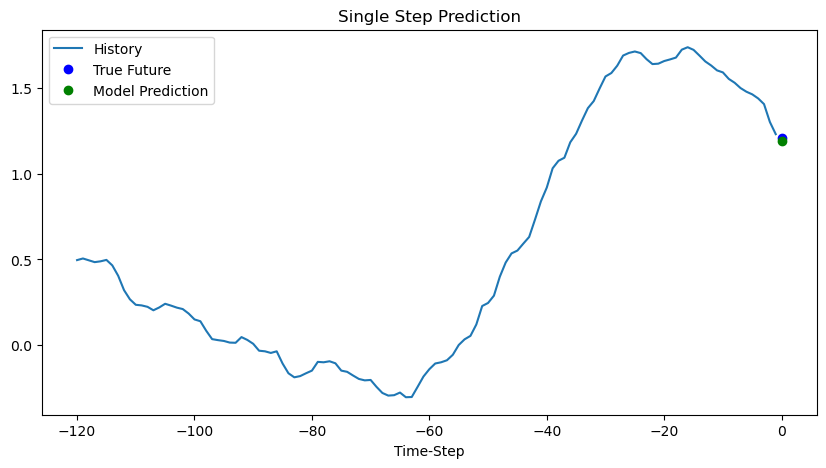

In [52]:
example = X_val[0]
example_input = np.expand_dims(example, axis=0)
pred = model.predict(example_input)[0]

plot_prediction(example.squeeze(), y_val[0], pred[0])